<a href="https://akademie.datamics.com/kursliste/">![title](bg_datamics_top.png)</a>

<center><em>© Datamics</em></center><br><center><em>Besuche uns für mehr Informationen auf <a href='https://akademie.datamics.com/kursliste/'>www.akademie.datamics.com</a></em></center>

# Kapitalgutpreismodell: CAPM - Capital Asset Pricing Model

Schau dir das Video an, um eine komplette Übersicht zu bekommen.

Portfolio Rendite:

## $r_p(t) = \sum\limits_{i}^{n}w_i r_i(t)$

Marktgewichte:

## $ w_i = \frac{MarketCap_i}{\sum_{j}^{n}{MarketCap_j}} $


### CAPM eines Portfolios


## $ r_p(t) = \beta_pr_m(t) + \sum\limits_{i}^{n}w_i \alpha_i(t)$

In [87]:
# Modelliere CAPM als einfache lineare Regression

In [88]:
from scipy import stats

In [89]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.  In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    
    Returns
    -------
    slope : float
        Slope of the regression line.
    intercept : float
        Intercept of the regression line.
    rvalue : float
        Correlation coefficient.
    pvalue : float
        Two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, 

In [90]:
import pandas as pd

Umgehen einer Fehlermeldung da sich die Methode **is_list_like** verschoben hat. Das sollte ab **pandas_datareader** Version 0.7 wieder ohne den Fix funktionieren:

In [91]:
pd.core.common.is_list_like = pd.api.types.is_list_like

In [92]:
import pandas_datareader as web

In [93]:
spy_etf = web.DataReader('SPY','stooq','2013-08-01','2018-08-01')

In [94]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2019-10-23 to 2014-10-27
Data columns (total 5 columns):
Open      1257 non-null float64
High      1257 non-null float64
Low       1257 non-null float64
Close     1257 non-null float64
Volume    1257 non-null int64
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [95]:
spy_etf.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-10-23,298.73,299.940,298.495,299.88,34991829
2019-10-22,300.58,300.900,298.910,299.01,49126038
2019-10-21,299.42,300.210,298.935,299.99,39460901
2019-10-18,298.69,299.395,296.990,297.97,64338028
2019-10-17,299.68,300.240,298.515,299.28,46784885


In [96]:
start = pd.to_datetime('2013-08-01')
end = pd.to_datetime('2018-08-01')

In [97]:
aapl = web.DataReader('AAPL','stooq',start,end)

In [98]:
aapl.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-10-23,242.10,243.24,241.220,243.18,19932545
2019-10-22,241.16,242.20,239.622,239.96,22684001
2019-10-21,237.52,240.99,237.320,240.51,22367483
2019-10-18,234.59,237.58,234.290,236.41,24377166
2019-10-17,235.09,236.15,233.520,235.28,17272897


In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

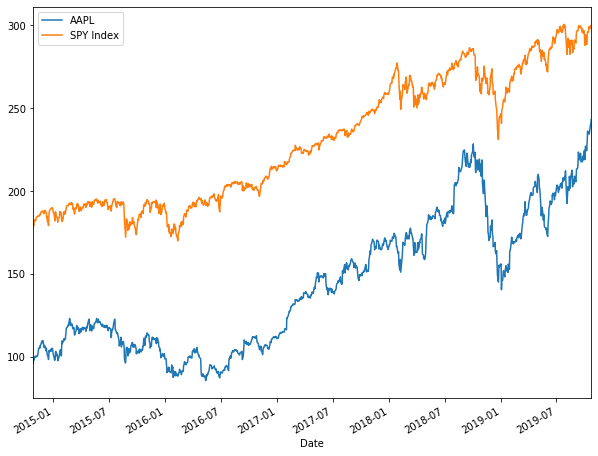

In [100]:
aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

## Vergleiche Gesamtrendite

In [101]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

Text(0.5, 1.0, 'Cumulative Return')

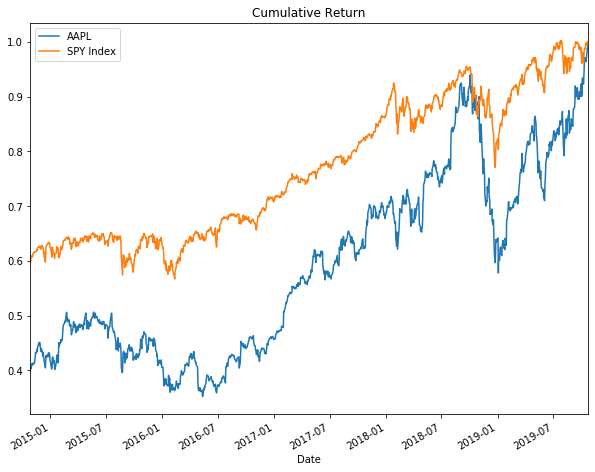

In [102]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('Cumulative Return')

## Erfasse Tägliche Rendite

In [103]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

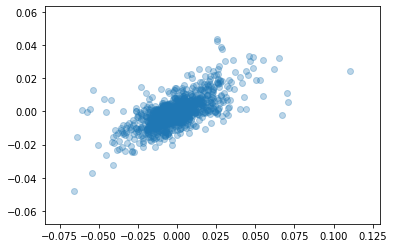

In [104]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.3)

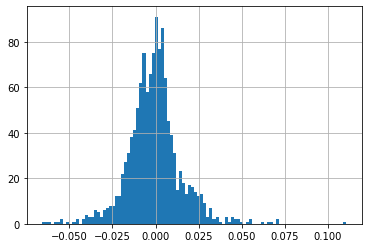

In [105]:
aapl['Daily Return'].hist(bins=100)

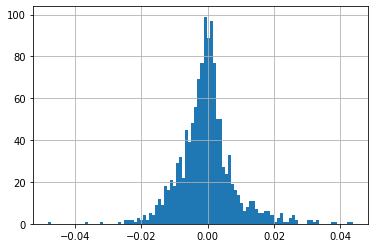

In [106]:
spy_etf['Daily Return'].hist(bins=100)

In [107]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [108]:
beta

0.36534999112239863

In [109]:
alpha

-0.00015656561979832231

In [110]:
r_value

0.6730232133754229

## Was wenn unsere Aktie vollständig mit SP500 verbunden wäre?

In [111]:
spy_etf['Daily Return'].head()

Date
2019-10-23         NaN
2019-10-22   -0.002901
2019-10-21    0.003277
2019-10-18   -0.006734
2019-10-17    0.004396
Name: Daily Return, dtype: float64

In [112]:
import numpy as np

In [113]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [114]:
noise

array([-0.00173082,  0.002112  ,  0.00098941, ..., -0.00042453,
        0.00031068, -0.00283954])

In [115]:
spy_etf['Daily Return'].iloc[1:] + noise

Date
2019-10-22   -0.004632
2019-10-21    0.005389
2019-10-18   -0.005744
2019-10-17    0.005759
2019-10-16   -0.003141
                ...   
2014-10-31   -0.000285
2014-10-30   -0.011452
2014-10-29   -0.006904
2014-10-28    0.001871
2014-10-27   -0.014137
Name: Daily Return, Length: 1256, dtype: float64

In [116]:
beta,alpha,r_value,p_value,std_err = stats.linregress(spy_etf['Daily Return'].iloc[1:]+noise,spy_etf['Daily Return'].iloc[1:])

In [117]:
beta

0.9887665216607422

In [118]:
alpha

-1.1638043360671891e-05

## Sieht aus, als wäre unser Verständnis korrekt!